# 线性问题与非线性问题
## 用线性单分逻辑回归分析肿瘤是良性还是恶性的
### 实例描述
假设某肿瘤医院想用神经网络对已有的病例数据进行分类，数据的样本特征包括病人的年龄和肿瘤的大小，对应的标签为改病例是良性肿瘤还是恶性肿瘤。
#### 生成样本集

In [11]:
#模拟数据点   
def generate(sample_size, mean, cov, diff,regression):   
    num_classes = 2 #len(diff)
    samples_per_class = int(sample_size/2)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        
    if regression==False: #one-hot  0 into the vector "1 0
        class_ind = [Y==class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    X, Y = shuffle(X0, Y0)
    
    return X,Y  

调用generate函数生成1000个数据，并图示化。
- 定义随机数的种子（这样可以保证每次运行代码是生成的随机值都一样）
- 定义生成类的个数num_classes=2
- 参数diff为3.0，表明两类数据的x和y差距3.0。传入的regression=True表明使用非one-hot编码标签。

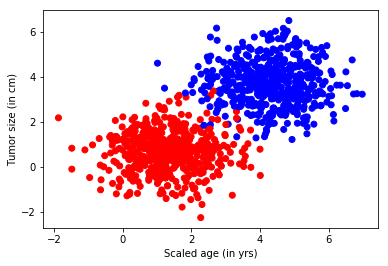

In [12]:
np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
X,Y = generate(1000,mean,cov,[3.0],True)

colors = ['r' if i == 0 else 'b' for i in Y[:]]
plt.scatter(X[:,0],X[:,1],c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

# 构建网络结构
使用一个神经元，先定义输入、输出两个占位符，然后是w和b的权重。

- 激活函数使用的是Sigmoid。
- 损失函数loss使用交叉熵，里面又加了一个平方差函数，用来评估模型的错误率。
- 优化器使用AdamOptimizer。

In [13]:
import tensorflow as tf
input_dim = 2  
input_features = tf.placeholder(tf.float32,[None,input_dim])

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
